In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can also write temporary files to /kaggle/temp/, but they 't be saved outside of the current session

In [2]:

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("student-scores.csv")

# Now you can work with your DataFrame 'df'
print(df.head()) 

   id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73             81   
1         

Intial Hypothesis: 1) Students who participate in part time jobs or extracuriccular activities have more absent days. 2) Students who have high study hours have both good grades and high career aspirations. 3) Students will have strengths in similar types of subjects. For example, english scores are similar to history scores and physics scores are similar to chemistry scores.

Check to see if data set had any missing values that needed to be dealt with

In [3]:
rows_with_missing_values = df.isna().any(axis=1)

# Print indices of rows with missing values
print("Indices of rows with missing values:")
for index, value in rows_with_missing_values.items():
    if value:
        print(index)

Indices of rows with missing values:


Start to look at hypothesis 1) Students who participate in part time jobs or extracuriccular activities have more absent days.
Do this by finding 4 averages: students who don't do either, those who don't do extracuricular and have a job, those who have a job and don't do extra curricular, and those who do both.

In [4]:
neither, n_count = 0,0
only_part_time,p_count = 0,0
only_extra,e_count = 0,0
both,b_count = 0,0
for i in range(len(df)):
    part_time = df.iloc[i]["part_time_job"]
    extra = df.iloc[i]["extracurricular_activities"]
    
    # both part tome job and extracuricular
    if part_time and extra:
        both += df.iloc[i]["absence_days"]
        b_count += 1
            
    # only part time
    elif part_time and not extra:
        only_part_time += df.iloc[i]["absence_days"]
        p_count += 1
    
    # only extra
    elif extra and not part_time:
        only_extra += df.iloc[i]["absence_days"]
        e_count += 1
            
    # neither
    elif not extra and not part_time:
        neither += df.iloc[i]["absence_days"]
        n_count += 1
        
        
both_avg = round(both/b_count,3)
part_avg = round(only_part_time/p_count,3)
extra_avg = round(only_extra/e_count,3)
neither_avg = round(neither/n_count,3)

print(f" Both Average: {both_avg} \n Part Time Average: {part_avg} \n Extracurricular Average: {extra_avg} \n Neither Average: {neither_avg}")
        

 Both Average: 5.016 
 Part Time Average: 4.894 
 Extracurricular Average: 3.601 
 Neither Average: 3.386


Just looking at these intial results, the averages tells us that the more actvities students take on after school, the more likely they are to miss school.

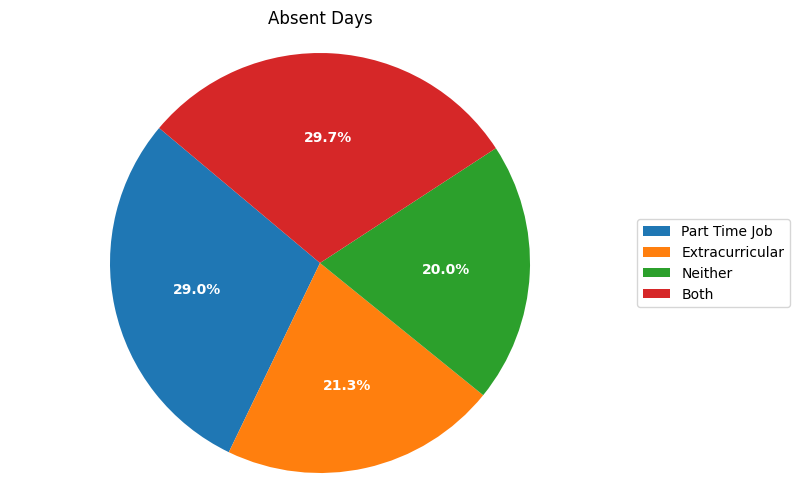

In [5]:
average_values = {'Category': ['Part Time Job', 'Extracurricular', 'Neither', 'Both'],
        'Values': [part_avg, extra_avg, neither_avg, both_avg]}
averages = pd.DataFrame(average_values)

# Plot a pie chart based on the 'Values' column
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(averages['Values'], autopct='%1.1f%%', startangle=140)
plt.title('Absent Days')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add legend on the right
plt.legend(patches, averages['Category'], loc="center left", bbox_to_anchor=(1, 0.5))

# Add percentages to the pie chart
plt.setp(autotexts, size=10, weight="bold", color="white")

plt.show()

Pie chart to help visualize fidnings. 
Conclussion: The more students do outside of school, the more likely they are to miss school days.

Hypothesis 2) Students who have high study hours have both good grades and high career aspirations
To do this, plot a students study hours versus the avergae of their classes and see what the distribution looks like.

In [6]:
students_weekly_hours = []
students_avg_scores = []
subjects = ["math_score","history_score","physics_score","chemistry_score","biology_score","english_score","geography_score"]
for index,student in df.iterrows():
    students_weekly_hours.append(student["weekly_self_study_hours"])
    score = 0
    for i in range(6):
        score += student[subjects[i]]
    avg_score = round(score/6,3)
    students_avg_scores.append(avg_score)


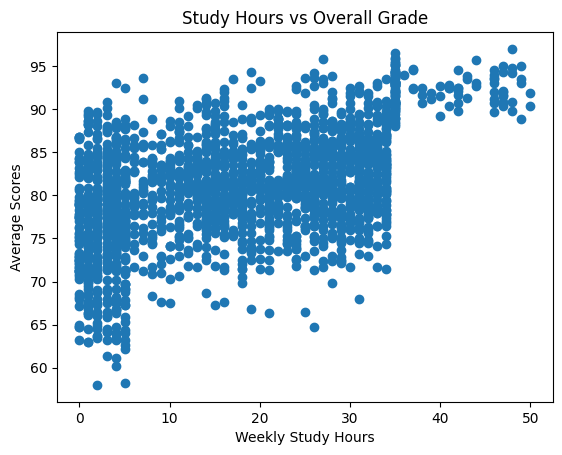

In [7]:
# Create scatter plot
plt.scatter(students_weekly_hours, students_avg_scores)

# Add labels and title
plt.xlabel('Weekly Study Hours')
plt.ylabel('Average Scores')
plt.title('Study Hours vs Overall Grade')
# Display the plot
plt.show()

It's not apparant, but it does seem that the more a student studies the more likely they are to succeed. 
Run a linear regression to see and correlation.

In [8]:
from scipy.stats import linregress

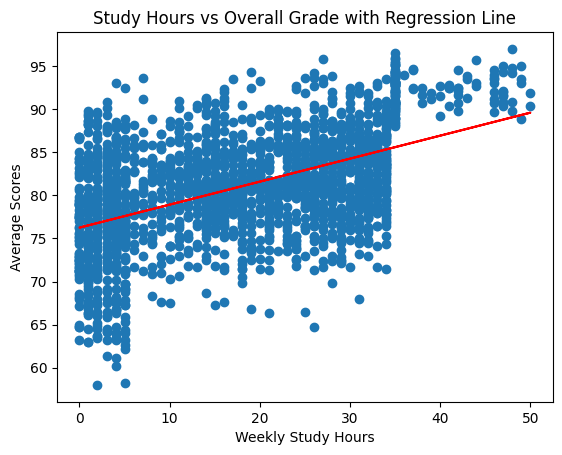

Slope: 0.2668983960196628
Intercept: 76.25682552947289
R-value: 0.49906110515107116
P-value: 1.9110289102058967e-126
Standard error: 0.01036803709977113


In [9]:
plt.scatter(students_weekly_hours, students_avg_scores)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(students_weekly_hours, students_avg_scores)

# Plot the regression line
plt.plot(students_weekly_hours, slope*np.array(students_weekly_hours) + intercept, color='red')

plt.xlabel('Weekly Study Hours')
plt.ylabel('Average Scores')
plt.title('Study Hours vs Overall Grade with Regression Line')

# Display the plot
plt.show()

# Print the regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

Given an extremely low P-value showing a high confidence of correlation and an R-Value that is approximately .5. There is a decently strong correlation between studying and good grades and that this sample is a good measure of all students. 

Hypothesis 3) Students will have strengths in similar types of subjects. For example, english scores are similar to history scores and physics scores are similar to chemistry scores. These two categories will be mutually exclusive, meaning a students score in english anf history have no bearing on the STEM courses.

If this is true the scores of those subjects will have an R-Value close to 1.

Check correlation between math and physics

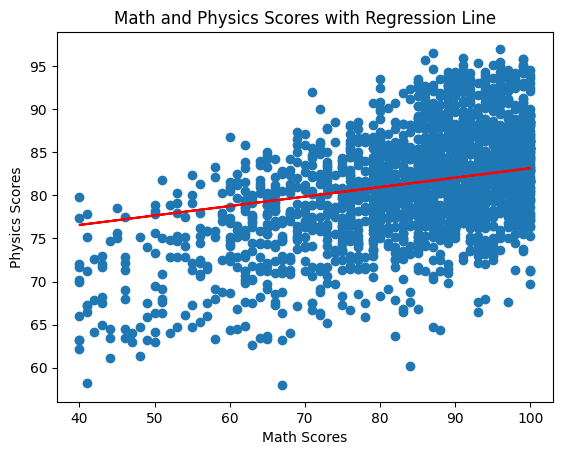

Slope: 0.10972098640920683
Intercept: 72.18006424217887
R-value: 0.11571874260426192
P-value: 2.1107988572384158e-07
Standard error: 0.0210698202128225


In [10]:
math_score = []
physics_score = []

for i in range(len(df)):
    math = df.iloc[i]["math_score"]
    math_score.append(math)
    physics = df.iloc[i]["physics_score"]
    physics_score.append(physics)

plt.scatter(math_score, students_avg_scores)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(math_score, physics_score)

# Plot the regression line
plt.plot(math_score, slope*np.array(math_score) + intercept, color='red')

plt.xlabel('Math Scores')
plt.ylabel('Physics Scores')
plt.title('Math and Physics Scores with Regression Line')

# Display the plot
plt.show()

# Print the regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

With this low R value they are not really correlated at all.
Try it with English and History.

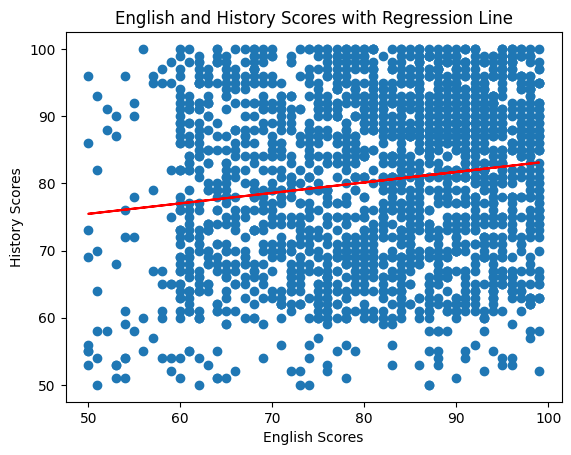

Slope: 0.15586944790673618
Intercept: 67.66332094776024
R-value: 0.1471928828115836
P-value: 3.7253593213934084e-11
Standard error: 0.02343257814832504


In [11]:
english_score = []
history_score = []

for i in range(len(df)):
    english = df.iloc[i]["english_score"]
    english_score.append(english)
    history = df.iloc[i]["history_score"]
    history_score.append(history)

plt.scatter(english_score, history_score)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(english_score, history_score)

# Plot the regression line
plt.plot(english_score, slope*np.array(english_score) + intercept, color='red')

plt.xlabel('English Scores')
plt.ylabel('History Scores')
plt.title('English and History Scores with Regression Line')

# Display the plot
plt.show()

# Print the regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

Safe to say almost no correlation here too.
Concluding that performance in one class has no influnece on another class.

In [12]:
counts = df["career_aspiration"].value_counts()

print(counts)

career_aspiration
Software Engineer        315
Business Owner           309
Unknown                  223
Banker                   169
Lawyer                   138
Accountant               126
Doctor                   119
Real Estate Developer     83
Stock Investor            73
Construction Engineer     68
Artist                    67
Game Developer            63
Government Officer        61
Teacher                   59
Designer                  56
Scientist                 39
Writer                    32
Name: count, dtype: int64


In [13]:
warnings.filterwarnings("ignore", category=FutureWarning)
career_data = pd.DataFrame(counts)
career_data["Avg Scores"] = 0
for i in range(len(df)):
    student_score = 0
    for subject in subjects:
        student_score += df.iloc[i][subject]
    avg_student_score = student_score/len(subjects)
    for career in counts.index:
        if career == df.iloc[i]["career_aspiration"]:
            career_data.loc[career,"Avg Scores"] += avg_student_score
            
career_data["Avg Scores"] = round(career_data["Avg Scores"] / career_data["count"],3)
print(career_data)

                       count  Avg Scores
career_aspiration                       
Software Engineer        315      82.215
Business Owner           309      74.484
Unknown                  223      79.879
Banker                   169      81.869
Lawyer                   138      84.157
Accountant               126      79.204
Doctor                   119      89.678
Real Estate Developer     83      79.349
Stock Investor            73      81.466
Construction Engineer     68      83.471
Artist                    67      80.665
Game Developer            63      81.785
Government Officer        61      80.925
Teacher                   59      80.605
Designer                  56      82.406
Scientist                 39      86.436
Writer                    32      84.054
